In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from __future__ import division

alpha = 0.05

# from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import scipy.stats as stats

pd.set_option('display.max_columns', 100)

In [3]:
sns.set(font_scale=1.6)
sns.set(style='ticks')
font = {'size' : 25}
params = {
    'legend.fontsize':15
}
plt.rc('font', **font)
plt.rcParams.update(params)

In [4]:
df = pd.read_csv('./data/esm_filtered_3.csv')

Drop First three artifact columns

In [5]:
cols = df.columns.tolist()
df.drop(labels=cols[:3], axis=1, inplace=True)

In [6]:
df.head(3)

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,previousResponsesOfTypeForUser,startTime_ISO8601,startTime_secondsSinceMidnight1Jan1970UTC,inResponseToAlert_id,estimatedSecondsSinceAlert,wantingAnything,whatWanting,wantingIntensity,wantedToFeel_pleasant,wantedToFeel_control,wantedToFeel_goodAboutMe,wantedToFeel_connected,wantedToFeel_comfort,wantedToFeel_calm,wantedToFeel_excited,wantedToFeel_competent,wantedToFeel_acknowledged,wantedToFeel_alert,wantedToFeel_other,wantedToFeel_specifiedOther,wantedToFeel_nothingInParticular,doing,doing_specifiedOther,withOthers,feelingBadToGood,energy,physically_hungry,physically_tired,physically_uncomfortable,physically_energized,physically_good,physically_other,physically_specifiedOther,physically_noFeeling,feeling_angry,feelingIntensity_angry,feeling_anxious,feelingIntensity_anxious,feeling_awe,feelingIntensity_awe,feeling_compassion,feelingIntensity_compassion,feeling_content,feelingIntensity_content,feeling_enthusiastic,feelingIntensity_enthusiastic,feeling_grateful,feelingIntensity_grateful,feeling_guilty,feelingIntensity_guilty,feeling_happy,feelingIntensity_happy,feeling_resentful,feelingIntensity_resentful,feeling_restless,feelingIntensity_restless,feeling_sad,feelingIntensity_sad,feeling_other,feeling_specifiedOther,feeling_noEmotion,thinkingOverAndOver,comparingToOthers,lonely,selfWorth,appreciating,stressed,endTime_ISO8601,endTime_secondsSinceMidnight1Jan1970UTC,client
0,464179,c2822848,4691a568625.a78f14cf-a990-44fc-9d26-8dd399dfd13d,2016-05-14T19:13:16.195Z,1463253196,16,2016-05-14T15:12:05-04:00,1463253125,4691a4bd5de.2b8d43d7-ebed-4a0d-aed1-6ae4c33514a7,63.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,0,other,Relaxing with friends outside,2.0,0.882,0.498,0,0,0,0,1,0,NaN,0,0,NaN,0,NaN,0,NaN,0,NaN,1,0.598,0,NaN,1,0.245,0,NaN,1,0.695,0,NaN,0,NaN,0,NaN,0,NaN,0,0.005,0.259,0.007,0.500,0.998,0.042,2016-05-14T15:13:15-04:00,1463253195,1
1,464187,37f0423c,4691ba46297.fea93b6e-c053-4cdb-9917-a86e16e3d820,2016-05-14T19:49:44.834Z,1463255384,11,2016-05-14T15:48:07-04:00,1463255287,4691b95c728.8c2688df-4e4d-4c1c-9c0c-a4369f8873d8,166.0,2.0,A tea steeper,1.0,0,1,0,0,0,0,0,0,0,0,0,NaN,0,other,Making tea,0.0,0.833,0.815,0,0,0,0,1,0,NaN,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.522,0,NaN,0,0.719,0.007,0.000,0.622,0.516,0.321,2016-05-14T15:49:43-04:00,1463255383,1
2,464189,cf7c120d,4691bf837e8.6cb3c170-bd4a-4e40-8504-d49a900010ca,2016-05-14T19:58:53.366Z,1463255933,14,2016-05-14T15:56:57-04:00,1463255817,4691be69915.4b9af48c-4f6f-4df3-8c28-852319382a8c,307.0,2.0,To be less anxious,1.0,0,1,0,0,1,0,0,1,0,0,0,NaN,0,leisure,NaN,2.0,0.755,1.000,0,0,0,1,0,0,NaN,0,0,NaN,1,1.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0.747,0,NaN,0,NaN,0,1.000,0.222,0.000,0.737,0.531,0.748,2016-05-14T15:58:52-04:00,1463255932,1


In [7]:
df.shape

(6116, 75)

In [8]:
df['user_id'].unique().shape

(95,)

In [9]:
print df.shape[0] / df['user_id'].unique().shape[0]

64.3789473684


Split up columns by question

In [10]:
continuous_cols = ['wantingIntensity','feelingBadToGood', 'energy', 'thinkingOverAndOver', 'comparingToOthers', \
                   'stressed', 'lonely','selfWorth','appreciating']

feeling_type_cols = cols[cols.index('feeling_angry'):cols.index('feelingIntensity_sad')+1:2] \
                        + ['feeling_other'] \
                        + ['feeling_noEmotion']
        
wanted_to_feel_cols = cols[cols.index('wantedToFeel_pleasant'):cols.index('wantedToFeel_nothingInParticular')+1]

feeling_cols = cols[cols.index('feeling_angry'):cols.index('feeling_other')+1] + ['feeling_noEmotion']

physical_cols = cols[cols.index('physically_hungry'):cols.index('physically_noFeeling')+1]

# Statistical Analysis
---

### Test continuous scales for normality

Shapiro-Wilks test for normality.
<br> **Null Hypothesis:** Data is drawn from a normally distributed population. 

In [10]:
a = df[continuous_cols].values

a = [a.T[i][~np.isnan(a.T[i])] for i in range(a.shape[1])]

In [11]:
def is_normal(shapiro_results):
    if shapiro_results[1] > 0.05:
        return 'Yes'
    else:
        return 'No'

In [12]:
matrix_sw = [[col, \
              len(a[i]) -1, \
              stats.shapiro(a[i])[0], \
              stats.shapiro(a[i])[1], \
              is_normal(stats.shapiro(a[i]))\
             ] for i,col in enumerate(continuous_cols)]

shapiro_table = pd.DataFrame(matrix_sw, columns=['Variable', '# Samples', 'W Statistic', 'p-value','Normal?'])

shapiro_table

/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Variable,# Samples,W Statistic,p-value,Normal?
0,wantingIntensity,2879,0.954244,3.813618e-29,No
1,feelingBadToGood,6115,0.978339,1.574704e-29,No
2,energy,6115,0.981788,2.519659e-27,No
3,thinkingOverAndOver,6115,0.857644,0.000000e+00,No
4,comparingToOthers,6115,0.642247,0.000000e+00,No
5,stressed,6115,0.821208,0.000000e+00,No
6,lonely,6115,0.596511,0.000000e+00,No
7,selfWorth,6115,0.980225,2.325531e-28,No
8,appreciating,6115,0.943879,3.082857e-43,No


Since none of the distribution for the continuous columns are drawn from normally distributed populations, we have two options:
1. Massage distributions until they are normal.
2. Use only tests that do _not_ assume normality.

**Use Box-Cox Power Transformation to attempt to transform Power-Log Distributions into Normal Distributions**

In [13]:
power_log_columns = continuous_cols[3:7]

In [14]:
matrix_bc = [\
    [col, \
    len(a[i]) -1, \
    stats.shapiro(stats.boxcox(a[i]+1)[0])[0], \
    stats.shapiro(stats.boxcox(a[i]+1)[0])[1], \
    is_normal(stats.shapiro((stats.boxcox(a[i]+1)[0])))\
    ] for i,col in enumerate(power_log_columns)\
]

boxcox_table = pd.DataFrame(matrix_bc, columns=['Variable', '# Samples', 'W Statistic', 'p-value','Normal?'])

boxcox_table

,Variable,# Samples,W Statistic,p-value,Normal?
0,thinkingOverAndOver,2879,0.956530,1.666833e-28,No
1,comparingToOthers,6115,0.983347,3.185318e-26,No
2,stressed,6115,0.985145,7.500629e-25,No
3,lonely,6115,0.860567,0.000000e+00,No


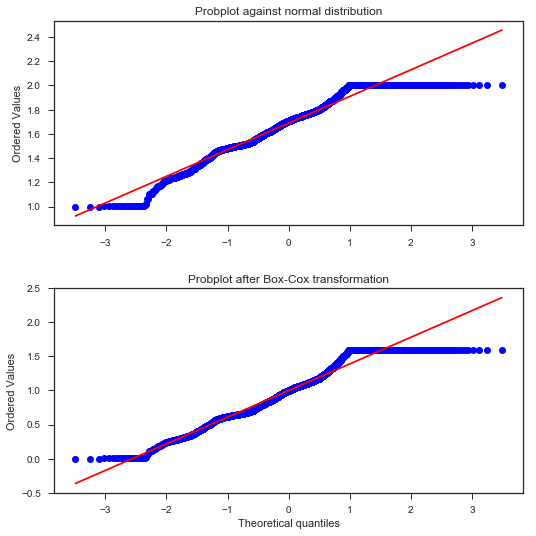

In [15]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
x = a[0]+1 # can't have 0 values in box-cox transform 
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(a[0]+1)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.tight_layout()

Attempting to transform log-normal distribution...

In [16]:
# Transform assuming log-normal distribtuion and Filter out infinites
np.log(idf['comparingToOthers'].values)[np.isfinite(np.log(idf['comparingToOthers'].values))]

NameError: name 'idf' is not defined

Well that didn't work

## Amount of Variability
---

### Within-Person Variability

Magnitude of single participant’s WPV Defined as the standard deviation across the recorded states for that participant.
<br>
For each person, we need to find the standard deviation for each continuous distribution. Then we can take the average of all of those standard deviations.


In [17]:
wpv = df[['user_id']+continuous_cols].groupby(by='user_id').std()

In [18]:
wpv.head()

,wantingIntensity,feelingBadToGood,energy,thinkingOverAndOver,comparingToOthers,stressed,lonely,selfWorth,appreciating
user_id,,,,,,,,,
04ea2b46,0.187234,0.206755,0.201197,0.188323,0.204259,0.267037,0.043698,0.179078,0.218274
04f1e745,0.200772,0.177522,0.205852,0.244214,0.189587,0.149132,0.023154,0.145913,0.232035
0835e410,0.219141,0.217410,0.253691,0.315043,0.245512,0.286689,0.234694,0.233212,0.313325
0d6a442f,0.170671,0.145326,0.164166,0.297362,0.177027,0.218210,0.262391,0.165726,0.194613
15f0de2b,0.145282,0.102775,0.102310,0.198129,0.150125,0.157603,0.219634,0.179480,0.174747


### Average Within-Person Variability

In [19]:
average_wpv = wpv.apply(func=np.mean, axis=0)
average_wpv.name = 'Average WPV'

In [20]:
average_wpv

wantingIntensity       0.187800
feelingBadToGood       0.165369
energy                 0.189483
thinkingOverAndOver    0.220826
comparingToOthers      0.144725
stressed               0.204926
lonely                 0.116550
selfWorth              0.142761
appreciating           0.250995
Name: Average WPV, dtype: float64

### Total Variation

Total Variation = standard deviation of each parameter across the entire data set. 

In [39]:
total_variation = df[continuous_cols].apply(np.std, axis=0)
total_variation.name = 'Total Variation'
total_variation

wantingIntensity       0.224586
feelingBadToGood       0.201768
energy                 0.224217
thinkingOverAndOver    0.295584
comparingToOthers      0.189972
stressed               0.257726
lonely                 0.171929
selfWorth              0.186167
appreciating           0.307707
Name: Total Variation, dtype: float64

In [49]:
variation = pd.concat(objs=[average_wpv, total_variation], axis=1)

In [50]:
variation['Diff (%)'] = variation['Average WPV']/variation['Total Variation']

In [51]:
variation['Diff (%)'] = variation['Diff (%)'].apply(lambda x: round(x,3))

In [52]:
variation

,Average WPV,Total Variation,Diff (%)
wantingIntensity,0.187800,0.224586,0.836
feelingBadToGood,0.165369,0.201768,0.820
energy,0.189483,0.224217,0.845
thinkingOverAndOver,0.220826,0.295584,0.747
comparingToOthers,0.144725,0.189972,0.762
stressed,0.204926,0.257726,0.795
lonely,0.116550,0.171929,0.678
selfWorth,0.142761,0.186167,0.767
appreciating,0.250995,0.307707,0.816


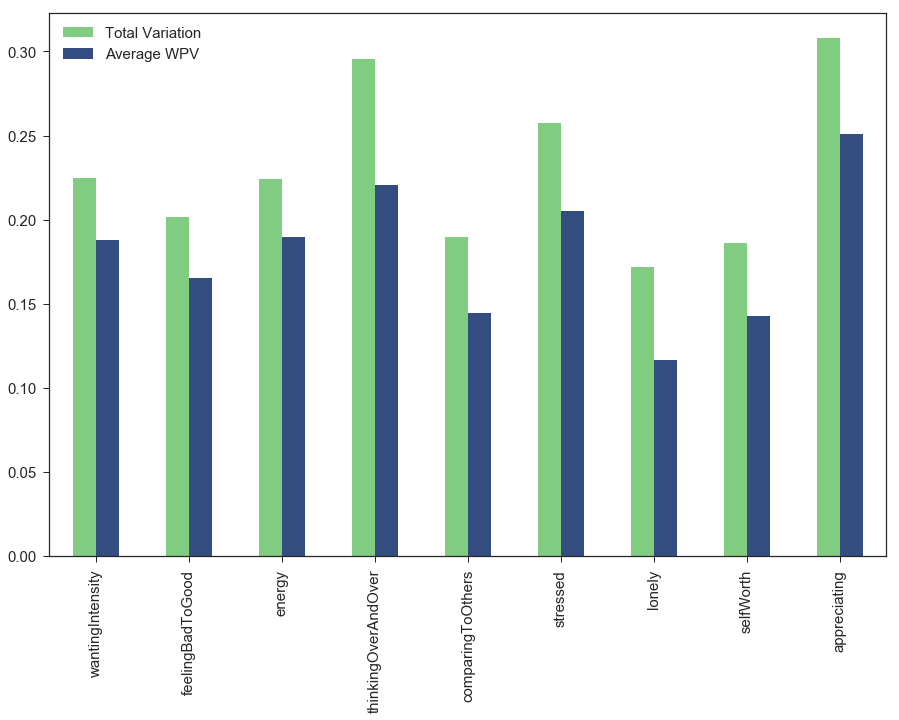

In [124]:
my_colors = [(0.5,0.8,0.5), (0.2, 0.3, 0.5)]

variation[[variation.columns[1]] + [variation.columns[0]]].iloc[:,:2].plot(kind='bar', rot=90, color=my_colors,fontsize=15, figsize=(15,10))

# plt.savefig('./images-esm/variations.png')

Average Within-Person Variation < Total variation for all variables. Although we would need to test with ANOVA to actually compare the two sets of variable means. 

### Between-Person Variation
calculated by taking the mean for each emotion/state for each person (which creates a distribution of means) and then calculating the standard deviation of the resulting distribution of means.

In [54]:
bpv = df[['user_id']+continuous_cols].groupby(by='user_id').mean().std()

bpv.name = 'Between-Person Variation'

bpv.head()

wantingIntensity       0.119702
feelingBadToGood       0.108196
energy                 0.113790
thinkingOverAndOver    0.184435
comparingToOthers      0.100787
Name: Between-Person Variation, dtype: float64

In [56]:
all_variations = pd.concat(objs=[variation,bpv], axis=1).drop(labels='Diff (%)', axis=1)

all_variations.head()

,Average WPV,Total Variation,Between-Person Variation
wantingIntensity,0.187800,0.224586,0.119702
feelingBadToGood,0.165369,0.201768,0.108196
energy,0.189483,0.224217,0.113790
thinkingOverAndOver,0.220826,0.295584,0.184435
comparingToOthers,0.144725,0.189972,0.100787


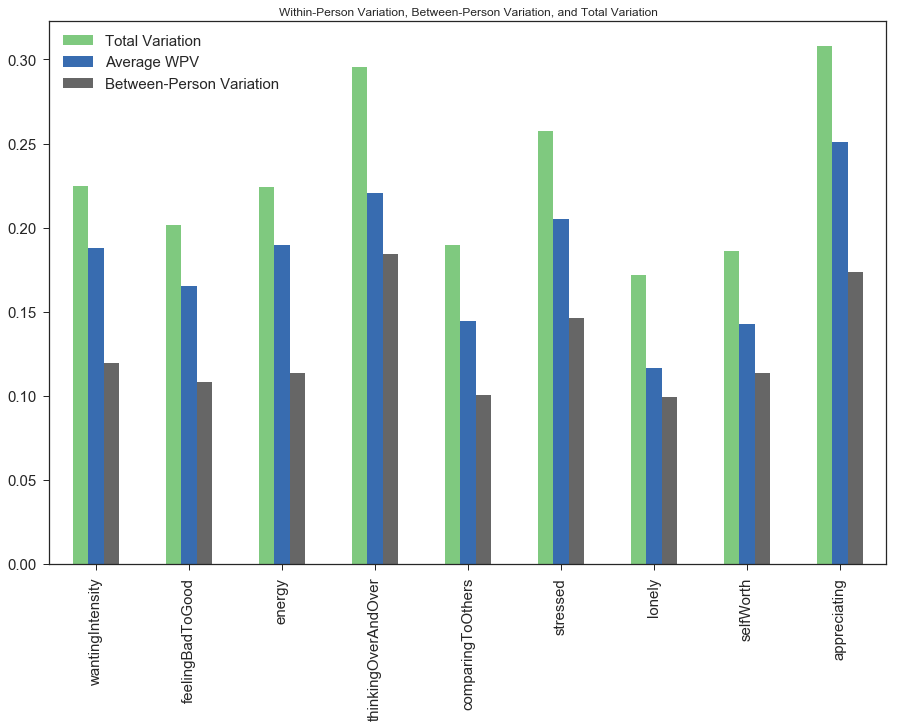

In [123]:
all_variations[[all_variations.columns[1]] + [all_variations.columns[0]] + [all_variations.columns[2]]]\
    .plot(kind='bar', sort_columns=True, fontsize=15, figsize=(15,10), \
          colormap='Accent', \
          title='Within-Person Variation, Between-Person Variation, and Total Variation')
    
plt.savefig('./images-esm/all-variations.png')

1. Distribution of the means for continuous variables 
2. Figure out what requirements of ANOVA are 
3. Think about what visualizations we want to do 
4. Recreate time-series plots with standardized times 
5. Read up on "Tutorial on Count Reression and Zero-Inflated Models" to explore how to handle our distributions 

### Distribution of the Means

In [12]:
means = df[['user_id']+continuous_cols].groupby(by='user_id').mean()

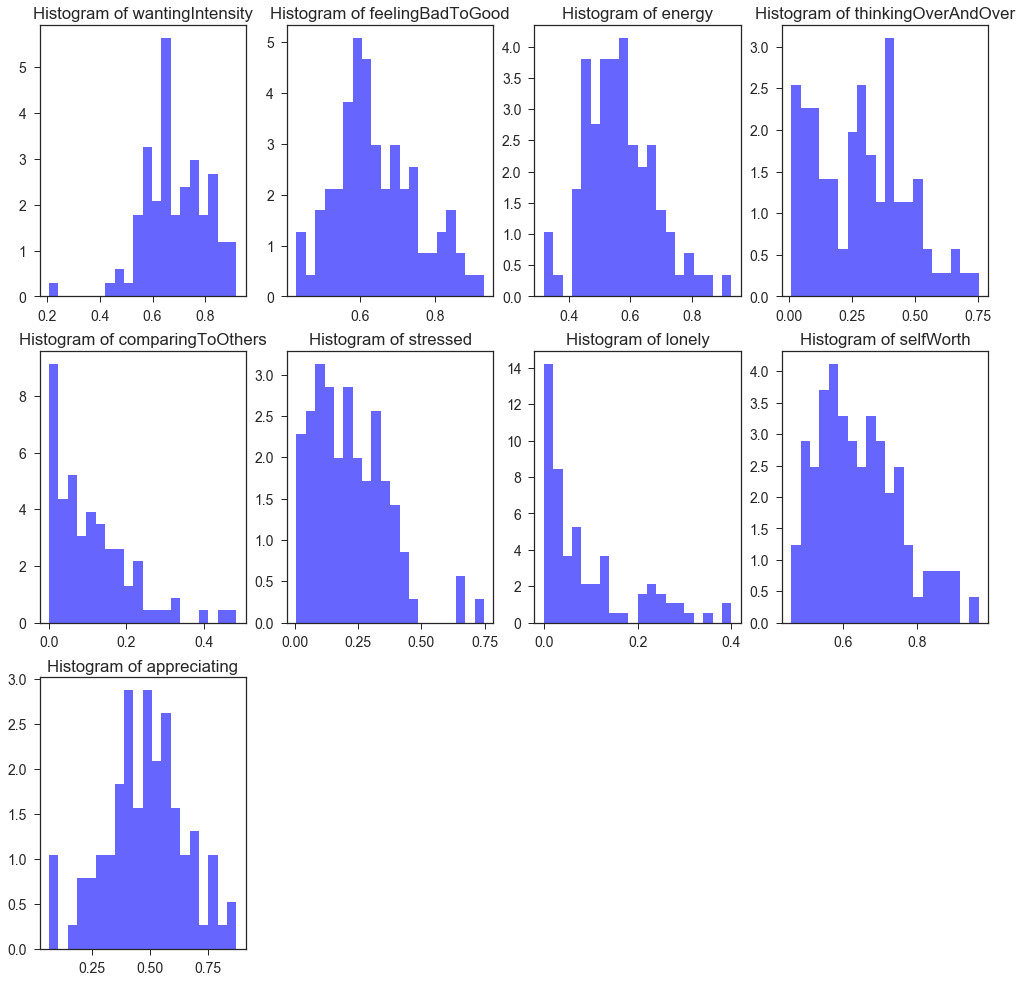

In [15]:
bins = 20
plt.figure(figsize=(17,17))

sns.set(font_scale=1.4, style='ticks')
for i in range(9):
    plt.subplot(3, 4, i+1)
    sns.distplot(a=means[continuous_cols[i]].dropna(axis=0).values, bins=bins, norm_hist=True, kde=False, color='blue', hist_kws={'alpha':0.6}, kde_kws={'color':'red', 'linewidth':1.5, 'alpha':0.6})
    plt.title('Histogram of {}'.format(continuous_cols[i]))
    
# plt.savefig('./images-esm/Histogram of Continuous Variables')

1. Finish time standardization
2. Create Christies plots
2. b. Wrap plotting functions 
3. Read distributions paper 
4. Look into massaging data 